# Ngram Language Models

In [ ]:
#!pip install -U nltk

In [ ]:
#!pip install datasets

In [ ]:
#!pip install evaluate

In [ ]:
#!pip install jiwer

## Import nltk library and read the data

In [ ]:
import nltk
from nltk.corpus import gutenberg

In [ ]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
gutenberg_corpus = gutenberg.fileids()

for i in range(len(gutenberg_corpus)):
  word_count = len(gutenberg.words(gutenberg_corpus[i]))
  print(f"{gutenberg_corpus[i]}: {word_count} words")

austen-emma.txt: 192427 words
austen-persuasion.txt: 98171 words
austen-sense.txt: 141576 words
bible-kjv.txt: 1010654 words
blake-poems.txt: 8354 words
bryant-stories.txt: 55563 words
burgess-busterbrown.txt: 18963 words
carroll-alice.txt: 34110 words
chesterton-ball.txt: 96996 words
chesterton-brown.txt: 86063 words
chesterton-thursday.txt: 69213 words
edgeworth-parents.txt: 210663 words
melville-moby_dick.txt: 260819 words
milton-paradise.txt: 96825 words
shakespeare-caesar.txt: 25833 words
shakespeare-hamlet.txt: 37360 words
shakespeare-macbeth.txt: 23140 words
whitman-leaves.txt: 154883 words


In [ ]:
len(gutenberg_corpus)

18

## Initial Dataset

In [ ]:
total_corpus = ''
for i in range(len(gutenberg_corpus)):
  print(gutenberg_corpus[i])
  total_corpus += gutenberg.raw(gutenberg_corpus[i])

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [ ]:
len(total_corpus)

11793318

### Total corpus

In [ ]:
print(total_corpus)

### Create sentences

In [ ]:
from nltk import sent_tokenize

sentences = sent_tokenize(total_corpus)

In [ ]:
for sent in sentences[:10]:
    print(sent)
    print("_________________")

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.
_________________
She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.
_________________
Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.
_________________
Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.
_________________
Between _them_ it was more the intimacy
of sisters.
_________________
Even 

### Tokenization using regular expressions (word level)

In [ ]:
def print_sents(sents: list, n_first:int) -> None:
  for sent in sents[:n_first]:
    print(sent)
    print("___________________")

In [ ]:
import re
from nltk.tokenize import RegexpTokenizer

# Step 1: Get the unique special sequences
special_sequences = re.findall(r'[^a-zA-Z0-9\s]+', total_corpus)
unique_special_sequences = sorted(set(special_sequences))
print("Special sequences found:", unique_special_sequences)
print("___________________")

# Step 2: Escape and join them for regex
escaped_specials = [re.escape(seq) for seq in unique_special_sequences]
special_pattern = '|'.join(escaped_specials)

# Step 3: Combine with your base pattern (words + punctuation)
base_pattern = r'[a-zA-Z0-9]+|[\(\)\.,_]'
combined_pattern = f'{special_pattern}|{base_pattern}'

# Step 4: Create the tokenizer
tokenizer = RegexpTokenizer(pattern=combined_pattern)

sentences_tokenized = []

for sent in sentences:
    sent_tok = tokenizer.tokenize(sent.lower())
    sentences_tokenized.append(sent_tok)

print_sents(sentences_tokenized, 20)

Special sequences found: ['!', '!!!"', '!"', '!"\'', '!")', '!"--', '!"?\'', "!'", '!\'"', "!')", "!'--", '!)', '!)"', '!),', '!)--', '!).', '!*', '!**', '!,', '!--', '!--"', "!--'", '!--(', '!--_', '!--`', '!.', '!.--', '!_', '"', '"!', '"!\'', '"\'', '").', '",', '"--', '"--(', '".', '"...', '":', '";', '"?', '"?\'', '"_', '"`', '"`...', '$', '$?', '%', '&', "'", '\'!"', '\'"', '\'"--', "''", "')", "',", '\',"', "',--", "'-", "'--", "'.", '\'."', "':", "';", "'?", '\'?"', '(', "('", '(*', '(*)', '(_', '(_)', '(~),', ')', ')(', '),', ')--', ")--'", ').', ')."', ').--', '):', '):--', ');', ');--', '*', '**', '***', '*--', '*:', '*[', '+', ',', ',"', ',"\'', ',",', ',"--', ',"--"', ",'", ',\'"', ",'--", ',)', ',)--', ',*', ',**', ',-', ',--', ',--"', ",--'", ',--_', ',--`', ',?;', ',_', '-', '-"', '--', '--!', '--"', '--"\'', '--"_', "--'", '--\'"', '--(', '--,', '---', '---"', '---,', '----', '----!"', '----"', '-----', '----------,', "--------.'", '---.', '--.', '--."', "--.'", '--:',

In [ ]:
# Step 5: Replace the underscore
clean_sentences_tokenized =  [[token.replace('_', '') for token in sublist] for sublist in sentences_tokenized]

### Train & Test Split

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
X = shuffle(clean_sentences_tokenized, random_state=20)

train, test = train_test_split(X, test_size=0.2, random_state=42)

## Statistical Language Models (LMs)

In [ ]:
from tqdm import tqdm
from collections import Counter

def unigram (tokens):
  unigram_counter = Counter()
  for sent in tqdm(tokens):
      # Update the unigram counter
      unigram_counter.update([(gram,) for gram in ["<s>"] + sent])
  return unigram_counter

def bigram (tokens):
  bigram_counter = Counter()
  for sent in tqdm(tokens):
      # Update the bigram counter
      bigram_pad_sent = ["<s>"] + sent +  ['<e>']
      bigram_counter.update([(gram1, gram2) for gram1, gram2 in zip(bigram_pad_sent, bigram_pad_sent[1:])])
  return bigram_counter

def trigram (tokens):
  trigram_counter = Counter()
  for sent in tqdm(tokens):
      # Update the trigram counter
      trigram_pad_sent = ["<s>"]*2 + sent +  ['<e>']*2
      trigram_counter.update([(gram1, gram2, gram3) for gram1, gram2, gram3 in zip(trigram_pad_sent, trigram_pad_sent[1:], trigram_pad_sent[2:])])
  return trigram_counter


In [ ]:
unigram_counter = unigram(train)
bigram_counter = bigram(train)
trigram_counter = trigram(train)
print("___________________")
print(len(unigram_counter))
print("___________________")
print(len(bigram_counter))
print("___________________")
print(len(trigram_counter))

100%|██████████| 75542/75542 [00:02<00:00, 27589.81it/s]

___________________
38531
___________________
451541
___________________
1154874


In [ ]:
from pprint import pprint

pprint(unigram_counter.most_common(10))
print()
pprint(bigram_counter.most_common(10))
print()
pprint(trigram_counter.most_common(10))

[((',',), 153483),
 (('the',), 106613),
 (('and',), 76032),
 (('<s>',), 75542),
 (('.',), 65438),
 (('of',), 56663),
 (('to',), 38381),
 ((':',), 38258),
 (('a',), 27015),
 (('in',), 26722)]

[(('.', '<e>'), 55782),
 ((',', 'and'), 34115),
 (('of', 'the'), 15187),
 (('in', 'the'), 8135),
 (('<s>', '"'), 8082),
 (('"', '<e>'), 7938),
 (("'", 's'), 7835),
 (('-', '-'), 7682),
 (('and', 'the'), 7046),
 ((',', '"'), 6185)]

[(('.', '<e>', '<e>'), 55782),
 (('<s>', '<s>', '"'), 8082),
 (('"', '<e>', '<e>'), 7938),
 (('?', '<e>', '<e>'), 5878),
 (('!', '<e>', '<e>'), 4597),
 (('.', '"', '<e>'), 4595),
 ((',', 'and', 'the'), 2914),
 (('<s>', '<s>', 'the'), 2897),
 (('<s>', '<s>', 'i'), 2811),
 (('<s>', '<s>', 'and'), 2481)]


In [ ]:
# Find the words that occur at least 10 times in the training subset
rare_words = set(key for key, value in unigram_counter.items() if value < 10)

In [ ]:
for key in rare_words:
    if '_' in key[0]:
        print(key[0])

In [ ]:
print("Total length of the corpus: ", len(total_corpus))
print("Total length of the rare words: ", len(rare_words))
print("Total length of the train dataset: ", len(train))
print("Total length of the test dataset: ", len(test))

Total length of the corpus:  11793318
Total length of the rare words:  29630
Total length of the train dataset:  75542
Total length of the test dataset:  18886


In [ ]:
rare_words

{('glacier',),
 ('hagabah',),
 ('snobs',),
 ('unostentatious',),
 ('areas',),
 ('tribulations',),
 ('142',),
 ('pouch',),
 ('anatomy',),
 ('scurry',),
 ('denounced',),
 ('wended',),
 ('quake',),
 ('sanscrit',),
 ('colloquy',),
 ('properties',),
 ('criticisms',),
 ('grisly',),
 ('tongued',),
 ('prodigies',),
 ('jumbled',),
 ('purtenance',),
 ('bolivia',),
 ('orbic',),
 ('gasps',),
 ('ruptured',),
 ('miscarrying',),
 ('bantam',),
 ('blindfold',),
 ('inflate',),
 ('undeceiving',),
 ('officiate',),
 ('unmanifested',),
 ('introspective',),
 ('alewives',),
 ('unfamiliar',),
 ('plugged',),
 ('calais',),
 ('augurers',),
 ('turtledove',),
 ('games',),
 ('submissively',),
 ('beholder',),
 ('stauncher',),
 ('sap',),
 ('university',),
 ('dismasted',),
 ('shashai',),
 ('tanach',),
 ('researches',),
 ('profitably',),
 ('indisputably',),
 ('inflicting',),
 ('ransacked',),
 ('approvingly',),
 ('saleable',),
 ('chivalric',),
 ('zophai',),
 ('yo',),
 ('hugeness',),
 ('miry',),
 ('ober',),
 ('doormat',),

### vocabulary

In [ ]:
# Calculate vocab size
vocab_size = len(unigram_counter) - len(rare_words)

In [ ]:
print("The size of the vocabulary is :" , vocab_size)
print("The lenght of the final tokenized sentences is:", len(clean_sentences_tokenized))

The size of the vocabulary is : 8901
The lenght of the final tokenized sentences is: 94428


In [ ]:
# Create as a list the tokens with poor frequency
flattened = [item[0] for item in rare_words]

print(flattened)

['glacier', 'hagabah', 'snobs', 'unostentatious', 'areas', 'tribulations', '142', 'pouch', 'anatomy', 'scurry', 'denounced', 'wended', 'quake', 'sanscrit', 'colloquy', 'properties', 'criticisms', 'grisly', 'tongued', 'prodigies', 'jumbled', 'purtenance', 'bolivia', 'orbic', 'gasps', 'ruptured', 'miscarrying', 'bantam', 'blindfold', 'inflate', 'undeceiving', 'officiate', 'unmanifested', 'introspective', 'alewives', 'unfamiliar', 'plugged', 'calais', 'augurers', 'turtledove', 'games', 'submissively', 'beholder', 'stauncher', 'sap', 'university', 'dismasted', 'shashai', 'tanach', 'researches', 'profitably', 'indisputably', 'inflicting', 'ransacked', 'approvingly', 'saleable', 'chivalric', 'zophai', 'yo', 'hugeness', 'miry', 'ober', 'doormat', 'squareness', 'dissension', 'complies', 'bracket', 'froze', 'composite', 'forepaws', 'meteor', 'slice', 'adultress', 'shortsighted', 'berites', 'clustered', 'knell', 'wooding', 'modifies', 'scaena', 'furl', 'willows', 'pageants', 'lyon', 'fern', 'ala

In [ ]:
len(flattened)

29630

In [ ]:
# Replace all out-of-vocabulary (OOV) words (in the training, development, test subsets) by a special token *UNK*
rare_set = set(flattened)
train1 = [['UNK' if word in rare_set else word for word in sentence] for sentence in train]
test1 = [['UNK' if word in rare_set else word for word in sentence] for sentence in test]

In [ ]:
print(len(train1))
print(len(test1))

75542
18886


In [ ]:
vocabulary = list(set(item for sublist in train1 for item in sublist))
vocab_size = len(vocabulary)
print(vocab_size)

8901


##  Laplace smoothing, Compute Sentence Log Probability, cross-entropy and perplexity

In [ ]:
import math
import numpy as np

In [ ]:
def sentence_log_prob(corpus, n, ngram_counter, lower_counter, alpha):
    total_log_prob = 0.0
    total_words = 0
    vocab_size = len(lower_counter)

    for sent in corpus:
        if n == 2:
            padded = ['start'] + sent + ['end']

            ngrams_list = list(zip(padded, padded[1:]))
        elif n == 3:
            padded = ['start1', 'start2'] + sent + ['end']
            ngrams_list = list(zip(padded, padded[1:], padded[2:]))

        for ngram in ngrams_list:
            # Skip predictions where target is a start token
            if n == 2 and ngram[1] == 'start':
                continue
            if n == 3 and (ngram[1] in ['start1', 'start2'] or ngram[2] in ['start1', 'start2']):
                continue

            if n == 2:
                history = (ngram[0],)
                target = ngram[1]
            elif n == 3:
                history = (ngram[0], ngram[1])
                target = ngram[2]

            # Laplace-smoothed probability
            prob = (ngram_counter[ngram] + alpha) / (lower_counter[history] + alpha * vocab_size)

            total_log_prob += math.log2(prob)
            total_words += 1

    # cross-entropy
    HC = -total_log_prob / total_words
    # perplexity
    perpl = 2 ** HC

    return total_log_prob, HC, perpl


In [ ]:
unigram_counter2 = unigram(train1)
bigram_counter2 = bigram(train1)
trigram_counter2 = trigram(train1)
print("___________________")
print(len(unigram_counter2))
print("___________________")
print(len(bigram_counter2))
print("___________________")
print(len(trigram_counter2))

100%|██████████| 75542/75542 [00:02<00:00, 27533.17it/s]

___________________
8902
___________________
336964
___________________
1032766


In [ ]:
from pprint import pprint

pprint(unigram_counter2.most_common(10))
print()
pprint(bigram_counter2.most_common(10))
print()
pprint(trigram_counter2.most_common(10))

[((',',), 153483),
 (('the',), 106613),
 (('and',), 76032),
 (('<s>',), 75542),
 (('UNK',), 75062),
 (('.',), 65438),
 (('of',), 56663),
 (('to',), 38381),
 ((':',), 38258),
 (('a',), 27015)]

[(('.', '<e>'), 55782),
 ((',', 'and'), 34115),
 (('UNK', ','), 15256),
 (('of', 'the'), 15187),
 (('the', 'UNK'), 8922),
 (('in', 'the'), 8135),
 (('<s>', '"'), 8082),
 (('"', '<e>'), 7938),
 (("'", 's'), 7835),
 (('-', '-'), 7682)]

[(('.', '<e>', '<e>'), 55782),
 (('<s>', '<s>', '"'), 8082),
 (('"', '<e>', '<e>'), 7938),
 (('?', '<e>', '<e>'), 5878),
 (('UNK', '.', '<e>'), 4854),
 (('!', '<e>', '<e>'), 4597),
 (('.', '"', '<e>'), 4595),
 (('UNK', ',', 'and'), 3570),
 ((',', 'and', 'the'), 2914),
 (('<s>', '<s>', 'the'), 2897)]


### Fine-tune alpha

In [ ]:
def find_best_alpha(corpus_val, n, ngram_counter, lower_counter, alphas):
    results = []

    for alpha in alphas:
        log_prob, HC, perplexity = sentence_log_prob(corpus_val, n, ngram_counter, lower_counter, alpha=alpha)
        results.append((alpha, perplexity))
        #print(f"Alpha: {alpha:.4f}, Perplexity: {perplexity:.4f}")

    # Find the alpha with the lowest perplexity
    best_alpha, best_perplexity = min(results, key=lambda x: x[1])
    print(f"\nBest alpha: {best_alpha:.4f} with perplexity {best_perplexity:.4f}")

    return best_alpha, results


In [ ]:
import matplotlib.pyplot as plt

def plot_alpha_vs_perplexity(results):
    alphas, perplexities = zip(*results)  # separate the list of tuples into two lists

    plt.figure(figsize=(8, 6))
    plt.plot(alphas, perplexities, marker='o')  # line plot with dots
    plt.xlabel('Alpha value')
    plt.ylabel('Perplexity')
    plt.title('Alpha vs. Perplexity')
    plt.grid(True)
    plt.show()

### Best alpha


Best alpha: 0.0150 with perplexity 255.4445


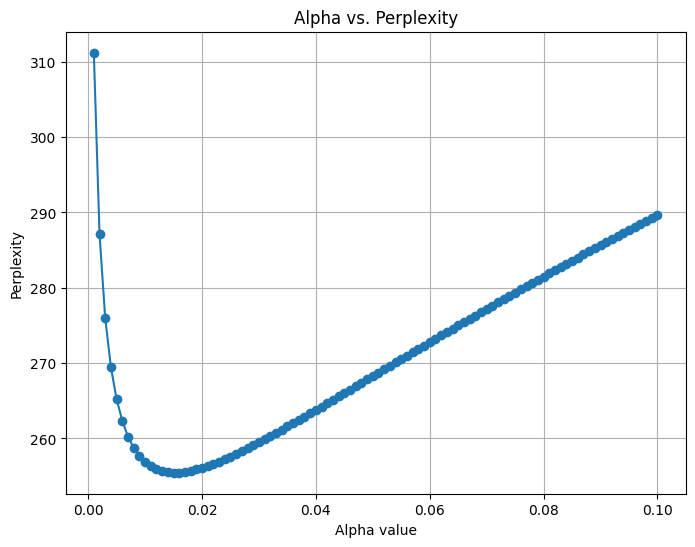

In [ ]:
# Choose a range of alphas to test
alphas = np.linspace(0.001, 0.1, 100)  # 20 values between 0.01 and 1.0

best_alpha, all_results = find_best_alpha(test1, n=2, ngram_counter=bigram_counter2, lower_counter=unigram_counter2, alphas=alphas)

plot_alpha_vs_perplexity(all_results)


Best alpha: 0.0010 with perplexity 4029.9679


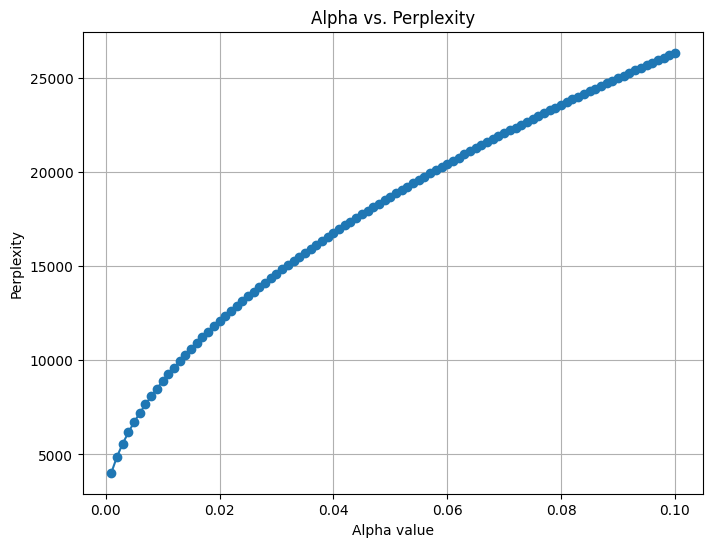

In [ ]:
alphas = np.linspace(0.001, 0.1, 100)  # 20 values between 0.01 and 1.0

best_alpha, all_results = find_best_alpha(test1, n=3, ngram_counter=trigram_counter2, lower_counter=bigram_counter2, alphas=alphas)

plot_alpha_vs_perplexity(all_results)

Trigrams need even smaller smoothing than bigrams because:

Trigram counts are much sparser — there are more possible triples of words.

Any extra smoothing easily "flattens" good patterns too much.

In [ ]:
log_prob, HC, perpl = sentence_log_prob(test1, 2, bigram_counter2, unigram_counter2, alpha=0.0150)
print(f"Log Prob: {log_prob:.4f}, Cross Entropy: {HC:.4f}, Perplexity: {perpl:.4f}")

Log Prob: -4427464.7536, Cross Entropy: 7.9969, Perplexity: 255.4445


In [ ]:
log_prob, HC, perpl = sentence_log_prob(test1, 3, trigram_counter2, bigram_counter2, alpha=0.0010)
print(f"Log Prob: {log_prob:.4f}, Cross Entropy: {HC:.4f}, Perplexity: {perpl:.4f}")

Log Prob: -6404868.7312, Cross Entropy: 11.9766, Perplexity: 4029.9679


## Auto-complete an incomplete sentence



---



In [ ]:
def autocomplete_bigram(start_sentence, bigram_counter, unigram_counter, vocab, max_words=10, alpha=0.1):
    sentence = start_sentence.copy()
    vocab_size = len(vocab)

    current_word = sentence[-1]
    for _ in range(max_words):
        candidates = []
        for word in vocab:
            prob = (bigram_counter[(current_word, word)] + alpha) / (unigram_counter[(current_word,)] + alpha * vocab_size)
            candidates.append((prob, word))

        # Pick the best next word
        best_word = max(candidates)[1]
        if best_word == 'end':
            break
        sentence.append(best_word)
        current_word = best_word

    return sentence

In [ ]:
def autocomplete_trigram(start_sentence, trigram_counter, bigram_counter, vocab, max_words=15, alpha=0.1):
    sentence = start_sentence.copy()
    vocab_size = len(vocab)

    prev_bigram = (sentence[-2], sentence[-1])
    for _ in range(max_words):
        candidates = []
        for word in vocab:
            prob = (trigram_counter[(prev_bigram[0], prev_bigram[1], word)] + alpha) / (bigram_counter[(prev_bigram[0], prev_bigram[1])] + alpha * vocab_size)
            candidates.append((prob, word))

        # Pick the best next word
        best_word = max(candidates)[1]
        if best_word == 'end':
            break
        sentence.append(best_word)
        prev_bigram = (prev_bigram[1], best_word)

    return sentence

### Examples

In [ ]:
start1 = ['the', 'woman', 'shall', 'go']
start1_auto = [word if word in vocabulary else 'UNK' for word in start1]
print(start1_auto)

['the', 'woman', 'shall', 'go']


In [ ]:
completed_bigram = autocomplete_bigram(start1, bigram_counter2, unigram_counter2, vocabulary)
print("Bigram completion:")
print(' '.join(completed_bigram))

completed_trigram = autocomplete_trigram(start1, trigram_counter2, bigram_counter2, vocabulary)
print("\nTrigram completion:")
print(' '.join(completed_trigram))

Bigram completion:
the woman shall go to the UNK , and the UNK , and the

Trigram completion:
the woman shall go out to the UNK of the lord , and the UNK of the lord ,


In [ ]:
start2 = ['we', 'know', 'that']
#start3 = ['he', 'should', 'have']
start3 = ['he', 'says', 'the']

start2 = [word if word in vocabulary else 'UNK' for word in start2]
start3 = [word if word in vocabulary else 'UNK' for word in start3]
print(start2)
print(start3)

['we', 'know', 'that']
['he', 'says', 'the']


In [ ]:
completed_bigram = autocomplete_bigram(start2, bigram_counter2, unigram_counter2, vocabulary)
print("Bigram completion:")
print(' '.join(completed_bigram))

completed_trigram = autocomplete_trigram(start2, trigram_counter2, bigram_counter2, vocabulary)
print("\nTrigram completion:")
print(' '.join(completed_trigram))

Bigram completion:
we know that he was a UNK , and the UNK , and

Trigram completion:
we know that i am sure i should have been UNK , and the UNK of the lord


In [ ]:
completed_bigram = autocomplete_bigram(start3, bigram_counter2, unigram_counter2, vocabulary)
print("Bigram completion:")
print(' '.join(completed_bigram))

completed_trigram = autocomplete_trigram(start3, trigram_counter2, bigram_counter2, vocabulary)
print("\nTrigram completion:")
print(' '.join(completed_trigram))

Bigram completion:
he says the UNK , and the UNK , and the UNK ,

Trigram completion:
he says the shilling was not a word , and the UNK of the lord , and the


## Context-aware spelling corrector

We have an input sequence of "noisy" words (misspelled, distorted), and we want to find the best sequence of real words (corrections).

we are combining:

* Spelling correction (based on how close words are — Levenshtein distance)

* Context (based on bigram or trigram probabilities — language model)

In [ ]:
from nltk.metrics import edit_distance
import math

In [ ]:
# return words from voc. with small Levenstein distance (=2) from 'noisy' word
def generate_candidates(noisy_word, vocab, max_distance=2):
    candidates = []
    for word in vocab:
        if edit_distance(noisy_word, word) <= max_distance:
            candidates.append(word)
    return candidates if candidates else ["UNK"]

In [ ]:
def bigram_prob(prev_word, word):
    return (bigram_counter2.get((prev_word, word), 0) + 0.01) / (unigram_counter2.get(prev_word, 0) + 0.01 * vocab_size)


def trigram_prob(prev2, prev1, word):
    return (trigram_counter2.get((prev2, prev1, word), 0) + 0.01) / (bigram_counter2.get((prev2, prev1), 0) + 0.01 * vocab_size)


In [ ]:
def beam_search_spelling_corrector(noisy_sequence, vocab,  use_trigram=False, beam_width=3, debug=True):
    beams = [(["<s>"], 0.0)]  # Start with start token and 0 score

    if use_trigram:
        beams = [(["<s>", "<s>"], 0.0)]  # For trigram model

    for noisy_word in noisy_sequence:
        new_candidates = []

        for seq, score in beams:
            if use_trigram:
                prev2, prev1 = seq[-2], seq[-1]
            else:
                prev1 = seq[-1]

            # Generate spelling correction candidates for noisy_word
            spelling_candidates = generate_candidates(noisy_word, vocab)

            for cand_word in spelling_candidates:
                # Spelling model score: inverse edit distance
                spelling_prob = 1 / (1 + edit_distance(noisy_word, cand_word))
                # Log probabilities to prevent underflow
                log_spelling = math.log(spelling_prob) if spelling_prob > 0 else float('-inf')

                if use_trigram:
                    lm_prob = trigram_prob(prev2, prev1, cand_word)
                else:
                    lm_prob = bigram_prob(prev1, cand_word)

                log_lm = math.log(lm_prob) if lm_prob > 0 else float('-inf')

                total_score = score + log_spelling + log_lm
                new_seq = seq + [cand_word]
                new_candidates.append((new_seq, total_score))

        # Keep top beams
        beams = sorted(new_candidates, key=lambda x: x[1], reverse=True)[:beam_width]

        if debug:
            print("\n***** Beams after word '{}': *****".format(noisy_word))
            for i, (seq, sc) in enumerate(beams):
                print(f"{i+1}: {' '.join(seq)} (score: {sc:.4f})")

    # After last word, add <e> (end token)
    final_candidates = []
    for seq, score in beams:
        if use_trigram:
            prev2, prev1 = seq[-2], seq[-1]
            lm_prob = trigram_prob(prev2, prev1, "<e>")
        else:
            prev1 = seq[-1]
            lm_prob = bigram_prob(prev1, "<e>")

        log_lm = math.log(lm_prob) if lm_prob > 0 else float('-inf')
        total_score = score + log_lm
        final_candidates.append((seq + ["<e>"], total_score))

    # Pick best final sequence
    best_sequence = max(final_candidates, key=lambda x: x[1])

    if debug:
        print("\n***** Final Best Sequence *****")
        print(' '.join(best_sequence[0]))
        print("Score: {:.4f}".format(best_sequence[1]))

    # Remove start tokens and end token
    if use_trigram:
        return best_sequence[0][2:-1]
    else:
        return best_sequence[0][1:-1]


In [ ]:
# Test sentence (noisy input)
noisy_sentence = ["me", "an", "hs", "wpon"]

# Run bigram corrector
corrected_bigram = beam_search_spelling_corrector(noisy_sentence, vocabulary, beam_width=3, use_trigram=False)

print("\n✅ Bigram Corrected Output:", corrected_bigram)

# Run trigram corrector
corrected_trigram = beam_search_spelling_corrector(noisy_sentence, vocabulary, beam_width=3, use_trigram=True)

print("\n✅ Trigram Corrected Output:", corrected_trigram)


***** Beams after word 'me': *****
1: <s> " (score: 3.4100)
2: <s> he (score: 2.4839)
3: <s> the (score: 2.3841)

***** Beams after word 'an': *****
1: <s> " i (score: 5.2762)
2: <s> " and (score: 4.5685)
3: <s> he was (score: 4.3002)

***** Beams after word 'hs': *****
1: <s> " and the (score: 7.8414)
2: <s> " and he (score: 7.3549)
3: <s> " i am (score: 7.2813)

***** Beams after word 'wpon': *****
1: <s> " and the son (score: 9.4008)
2: <s> " and the moon (score: 6.8080)
3: <s> " and the wood (score: 6.5979)

***** Final Best Sequence *****
<s> " and the son <e>
Score: 0.3069

✅ Bigram Corrected Output: ['"', 'and', 'the', 'son']

***** Beams after word 'me': *****
1: <s> <s> " (score: 3.4100)
2: <s> <s> he (score: 2.4839)
3: <s> <s> the (score: 2.3841)

***** Beams after word 'an': *****
1: <s> <s> " i (score: 0.3071)
2: <s> <s> he was (score: -0.6549)
3: <s> <s> " and (score: -0.7902)

***** Beams after word 'hs': *****
1: <s> <s> " i am (score: -2.9578)
2: <s> <s> " i ' (score: 

## Create an artificial test dataset

In [ ]:
import random
import string

def introduce_noise_on_words(sentence_list, noise_prob=0.05):
    noisy_sentence = []
    for word in sentence_list:
        noisy_word = ''
        for char in word:
            if random.random() < noise_prob:
                noisy_word += random.choice(string.ascii_lowercase)
            else:
                noisy_word += char
        noisy_sentence.append(noisy_word)
    return noisy_sentence

In [ ]:
noisy_dataset = [introduce_noise_on_words(sentence) for sentence in test1]

In [ ]:
print_sents(noisy_dataset, 15)

['mnne', 'was', 'to', 'leave', 'them', 'on', 'the', 'morlow', ',', 'an', 'event', 'which', 'they', 'ail', 'dreaded', '.']
___________________
['farm', '.']
___________________
['two', 'steps', ',', 'janu', ',', 'take', 'care', 'of', 'the', 'two', 'steps', '.']
___________________
['she', 'thoumht', '.']
___________________
['the', 'road', 'is', 'before', 'us', '!']
___________________
['13', ':', '3', 'and', 'mosed', 'by', 'the', 'rommhndment', 'of', 'the', 'hord', 'sent', 'them', 'from', 'the', 'wilderness', 'of', 'UNK', ':', 'all', 'those', 'men', 'wery', 'heads', 'of', 'the', 'children', 'of', 'israel', '.']
___________________
['for', 'the', 'UNK', 'dr', '.', 'renard', 'had', 'deliberately', 'raised', 'his', 'revtlvej', 'and', 'firpd', 'twice', 'at', 'bull', 'b', 'so', 'xhat', 'twe', 'kNK', 'rang', 'wown', 'the', 'road', '.']
___________________
['34', ':', '11', 'and', 'shechem', 'daid', 'uito', 'her', 'father', 'and', 'ueto', 'har', 'brethren', ',', 'let', 'me', 'find', 'grace', 

In [ ]:
a = noisy_dataset[0]
b = noisy_dataset[14]

In [ ]:
# Test sentence (noisy input)
noisy_sentence = b #a

# Run bigram corrector
corrected_bigram = beam_search_spelling_corrector(noisy_sentence, vocabulary, beam_width=3, use_trigram=False)

print("\n✅ Bigram Corrected Output:", corrected_bigram)

# Run trigram corrector
corrected_trigram = beam_search_spelling_corrector(noisy_sentence, vocabulary, beam_width=3, use_trigram=True)

print("\n✅ Trigram Corrected Output:", corrected_trigram)


***** Beams after word 'every': *****
1: <s> every (score: -0.2119)
2: <s> even (score: -1.3245)
3: <s> very (score: -1.5440)

***** Beams after word 'one': *****
1: <s> every one (score: 1.0708)
2: <s> even the (score: -1.6286)
3: <s> even in (score: -2.3792)

***** Beams after word 'thbt': *****
1: <s> even in the (score: 1.0374)
2: <s> every one that (score: 0.8996)
3: <s> even in that (score: -1.5280)

***** Beams after word 'pssseth': *****
1: <s> every one that passeth (score: -1.6425)
2: <s> even in that passeth (score: -4.0701)
3: <s> even in the passeth (score: -8.7497)

***** Beams after word 'by': *****
1: <s> every one that passeth by (score: -4.0506)
2: <s> even in that passeth by (score: -6.4782)
3: <s> every one that passeth , (score: -7.2199)

***** Beams after word 'her': *****
1: <s> every one that passeth by the (score: -2.1672)
2: <s> every one that passeth by her (score: -3.5625)
3: <s> every one that passeth by his (score: -4.0772)

***** Beams after word 'sholl'

##  Evaluation with Word Error Rate (WER) and Character Error Rate (CER)

In [ ]:
import evaluate
from evaluate import load

In [ ]:
# Load metrics from Huggingface
wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def evaluate_spelling_corrector_hf(clean_sentences, noisy_sentences, corrector_fn):
    preds = []

    for noisy_sent in noisy_sentences:

        corrected_tokens = corrector_fn(noisy_sent, vocabulary, use_trigram=True, beam_width=3, debug=False)
        corrected_sent = ' '.join(corrected_tokens)

        preds.append(corrected_sent)

    # Compute metrics
    wer = wer_metric.compute(predictions=preds, references=clean_sentences)
    cer = cer_metric.compute(predictions=preds, references=clean_sentences)

    return wer, cer

In [ ]:
import random

# Sample your data
sample_size = 500
random.seed(42)
sample_indices = random.sample(range(len(noisy_dataset)), sample_size)

noisy_sample = [noisy_dataset[i] for i in sample_indices]
clean_sample = [test1[i] for i in sample_indices]

# Join clean sample into sentences
clean_sample_joined = [' '.join(sentence) for sentence in clean_sample]

In [ ]:
avg_wer, avg_cer = evaluate_spelling_corrector_hf(
    clean_sentences=clean_sample_joined,
    noisy_sentences=noisy_sample,
    corrector_fn=beam_search_spelling_corrector )

print(f"Huggingface WER: {avg_wer:.4f}")
print(f"Huggingface CER: {avg_cer:.4f}")

Huggingface WER: 0.3766
Huggingface CER: 0.1550
